In [11]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetBuilder
import matplotlib.pyplot as plt 

In [12]:
load_dotenv(override=True)
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

In [13]:
login(os.environ['HF_TOKEN'],add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [14]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", f"raw_meta_Appliances", split='full', trust_remote_code=True)

In [15]:
len(dataset)

94327

In [16]:
sample = dataset[2]

In [17]:
sample

{'main_category': 'Tools & Home Improvement',
 'title': 'Clothes Dryer Drum Slide, General Electric, Hotpoint, WE1M333, WE1M504',
 'average_rating': 3.5,
 'rating_number': 18,
 'features': [],
 'description': ['Brand new dryer drum slide, replaces General Electric, Hotpoint, RCA, WE1M333, WE1M504.'],
 'price': 'None',
 'images': {'hi_res': ['https://m.media-amazon.com/images/I/51TIpnkrEpL._AC_SL1500_.jpg'],
  'large': ['https://m.media-amazon.com/images/I/21HQKcHPIkL._AC_.jpg'],
  'thumb': ['https://m.media-amazon.com/images/I/21HQKcHPIkL._AC_US75_.jpg'],
  'variant': ['MAIN']},
 'videos': {'title': [], 'url': [], 'user_id': []},
 'store': 'GE',
 'categories': ['Appliances', 'Parts & Accessories'],
 'details': '{"Manufacturer": "RPI", "Part Number": "WE1M333,", "Item Weight": "0.352 ounces", "Package Dimensions": "5.5 x 4.7 x 0.4 inches", "Item model number": "WE1M333,", "Is Discontinued By Manufacturer": "No", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Requi

In [18]:
print(sample['title'])
print(sample['description'])
print(sample['features'])
print(sample['details'])
print(sample['price'])


Clothes Dryer Drum Slide, General Electric, Hotpoint, WE1M333, WE1M504
['Brand new dryer drum slide, replaces General Electric, Hotpoint, RCA, WE1M333, WE1M504.']
[]
{"Manufacturer": "RPI", "Part Number": "WE1M333,", "Item Weight": "0.352 ounces", "Package Dimensions": "5.5 x 4.7 x 0.4 inches", "Item model number": "WE1M333,", "Is Discontinued By Manufacturer": "No", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Required?": "No", "Best Sellers Rank": {"Tools & Home Improvement": 1315213, "Parts & Accessories": 181194}, "Date First Available": "February 25, 2014"}
None


In [19]:
not_none_prices_data = [float(price) for price in dataset['price'] if price != 'None']
percentage_not_none = len(not_none_prices_data)/len(dataset) * 100
print(f"{percentage_not_none: .1f} of the dataset does not have None price")

 49.5 of the dataset does not have None price


In [20]:
content = [data['title'] + str(data['description']) + str(data['features']) +str (data['details']) + data['price'] for data in dataset if data['price'] != None]

In [21]:
lengths = [len(data['title'] + str(data['description']) + str(data['features']) +str (data['details']) + data['price']) for data in dataset if data['price'] != None]

KeyboardInterrupt: 

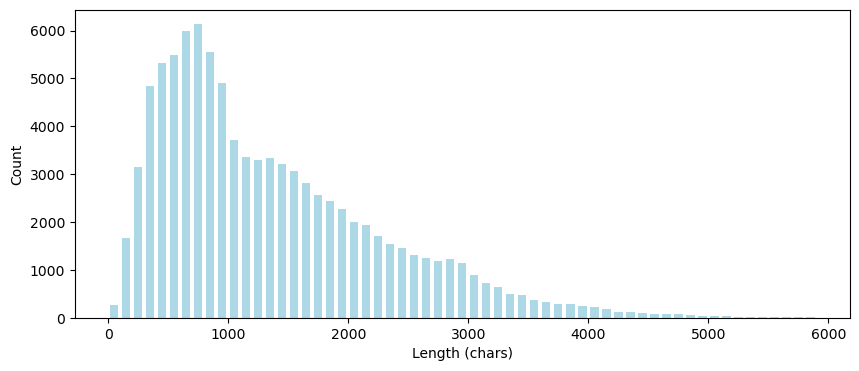

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.show()


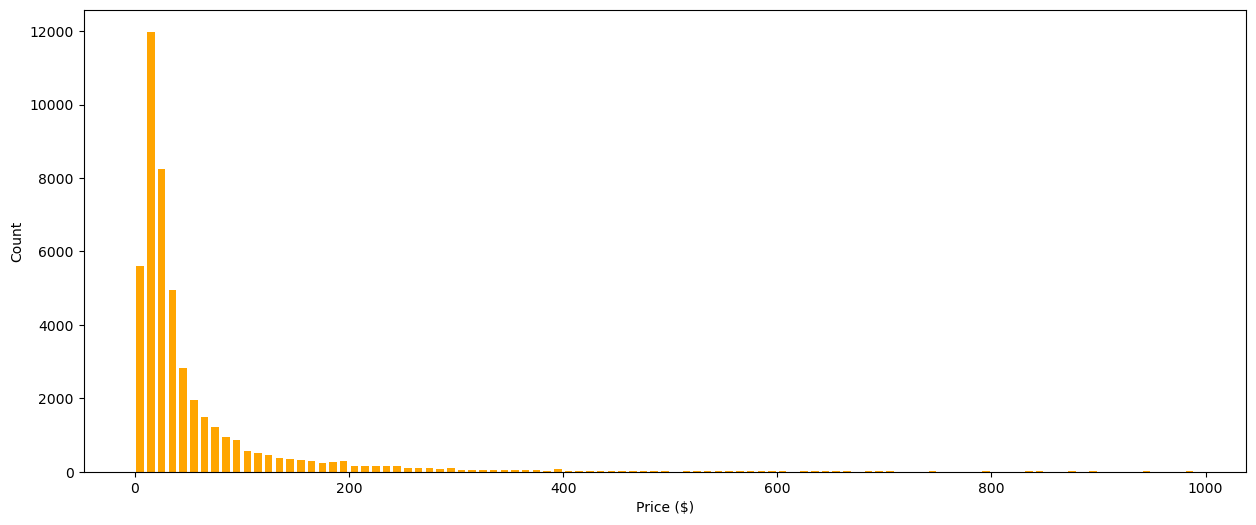

In [ ]:
plt.figure(figsize=(15, 6))
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(not_none_prices_data, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()

In [25]:

from items import Item
items = []
for sample in dataset:
    try:
        price = float(sample['price'])
        if price>0:
            item = Item(sample, price)
            if item.include:
                items.append(item)
    except ValueError as e:
        pass

In [30]:
items

[<MLGB Stainless Steel Brushed Pattern Dishwasher Magnet Cover Panel Decal Home Appliance Art, Stainless Steel Fridge Door Cover Decals Magnetic, Black, Mobile Magnetic 23" x 26" = $38.99>,
 <Homa Yellow Flower Bouquet Floral Dishwasher Magnet，Green Border Accent with Lemons Sticker Refrigerator Magnetic Cover Panel Decal 23 W x 17 H = $34.99>,
 <349241T Dryer Drum Roller Kit Whirlpool Kenmore Amana AP3098345 PS347627 Support Part Replacement 110.62832101 110.71402310 WED4815EW0 WED4815EW1 WED49STBW1 WED7000DW0 MEDC465HW0 RED4516FW0 RED4640YQ1 = $7.95>,
 <Nordic Ware 60030F 17 Oz. Oval Casserole Dish = $13.04>,
 <PARTY BARGAINS 600 Paper Coffee Filters - White Classic Design Single-Use Coffee Filter Compatible for Keurig 1.0 & 2.0, Perfect Size and Quantity = $28.99>,
 <HERISUN 100 Disposable Coffee Filters for Single Serve 1.0 and 2.0 Coffee Filter Paper Use with Reusable K Cup Filter Pods (Natural) = $7.99>,
 <VIVOHOME Electric Portable Compact Countertop Automatic Ice Cube Maker Mac